**1. Plot the estimated parameters of training dataset**

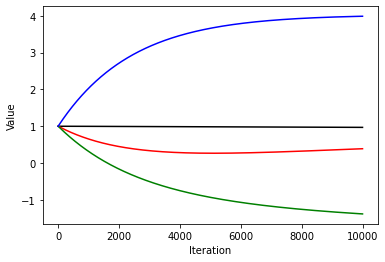

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv('data_train.csv', header=None)

x = data[0].values
y = data[1].values
z = data[2].values
h = data[3].values

x0 = np.ones(len(x))
X = np.array([x0, x, y, z]).T
Y = np.array(h)
# Initial parameters
B = np.array([1, 1, 1, 1])
lr = 0.00001

t0 = []
t1 = []
t2 = []
t3 = []
t0.append(B[0])
t1.append(B[1])
t2.append(B[2])
t3.append(B[3])

def gradient_descent(X, Y, B, lr, iterations):
  cost_history = [0] * iterations
  m = len(Y)
  for iteration in range(iterations):
    # Hypothesis Values
    h = X.dot(B)
    # Difference b/w Hypothesis and Actual Y
    loss = (h - Y) / 2
    # Gradient Calculation
    gradient = X.T.dot(loss) / m
    # Changing Values of B using Gradient
    B = B - lr * gradient   
    # Track parameter
    t0.append(B[0])
    t1.append(B[1])
    t2.append(B[2])
    t3.append(B[3])
  return B, cost_history

iterations = 10000
parameters, cost_history = gradient_descent(X, Y, B, lr, iterations)

plt.plot(t0, color='k')
plt.plot(t1, color='r')
plt.plot(t2, color='g')
plt.plot(t3, color='b')

plt.xlabel('Iteration')
plt.ylabel('Value')
plt.show()


**2. Plot tthe training eror using the training dataset**

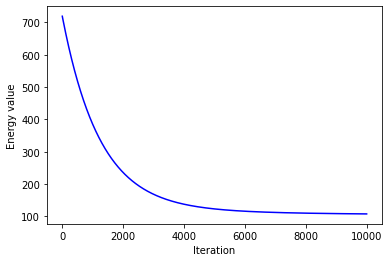

In [65]:
data = pd.read_csv('data_train.csv', header=None)
x_train = np.array(data.iloc[:,0:-1])
y_train = np.array(data.iloc[:,[-1]])
def EnergyTrainData(w1, w2, w3, b):
    total_e = 0
    for i in range(len(x_train)):
        total_e += ((w1 * x_train[i][0] + w2 * x_train[i][1] + w3 * x_train[i][2] + b) - y_train[i]) ** 2
    return total_e / (2 * float(len(x_train)))

energy_train = []
for i in range(iterations):
  e = EnergyTrainData(t1[i], t2[i], t3[i], t0[i])
  energy_train.append(e)

plt.plot(energy_train, color='b')
plt.xlabel('Iteration')
plt.ylabel('Energy value')
plt.show()